In [161]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [162]:
IMAGE_SIZE = 500
CHANNELS = 3

In [163]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '../Valid_Black_pepper_leaf_dataset/Train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1322 images belonging to 2 classes.


In [164]:
train_generator.class_indices

{'Black_pepper_leaf': 0, 'Non_Black_pepper_leaf': 1}

In [165]:
class_names = list(train_generator.class_indices.keys())
class_names

['Black_pepper_leaf', 'Non_Black_pepper_leaf']

In [166]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 ...

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]


In [167]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '../Valid_Black_pepper_leaf_dataset/Valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 163 images belonging to 2 classes.


In [168]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '../Valid_Black_pepper_leaf_dataset/Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 167 images belonging to 2 classes.


In [169]:
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)
validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

In [170]:
train_dataset = train_dataset.repeat()  # Repeat indefinitely
validation_dataset = validation_dataset.repeat()

In [171]:
for image_batch, label_batch in validation_generator:
    print(image_batch[0])
    break

[[[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 ...

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]


In [172]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(16, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [173]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 498, 498, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 249, 249, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 247, 247, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 58, 58, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 27, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,738 (1.24 MB)

 Trainable params: 324,738 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [175]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    batch_size=32,
    validation_data=validation_dataset,
    validation_steps=len(validation_generator),
    verbose=1,
    epochs=10,
)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.6829 - loss: 0.5436 - val_accuracy: 0.9693 - val_loss: 0.1073
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9331 - loss: 0.2245 - val_accuracy: 0.9632 - val_loss: 0.0710
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9811 - loss: 0.0616 - val_accuracy: 0.9755 - val_loss: 0.1313
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9749 - loss: 0.0812 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9956 - loss: 0.0217 - val_accuracy: 0.9939 - val_loss: 0.0749
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9819 - loss: 0.0749 - val_accuracy: 0.9877 - val_loss: 0.0609
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9859 - loss: 0.0412 - val_accuracy: 0.9877 - val_loss: 0.0683
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9890 - loss: 0.0402 - val_accuracy: 0.9939 - val_loss:

In [176]:
scores = model.evaluate(test_generator)

c:\Users\Harthik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0010    


In [177]:
scores

[0.0019356160191819072, 1.0]

In [178]:
history

In [179]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 42}

In [180]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [181]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

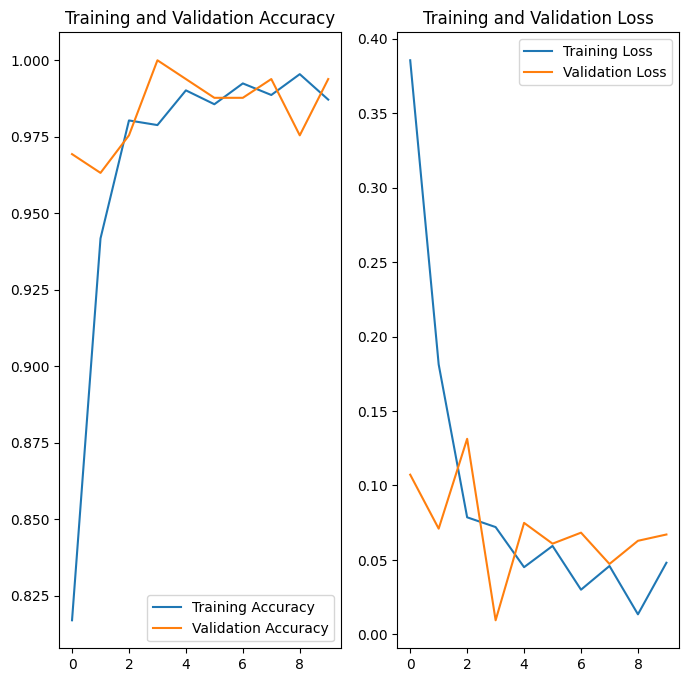

In [182]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Black_pepper_leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
predicted label: Black_pepper_leaf


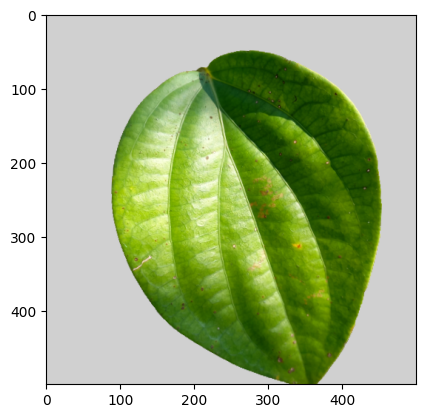

In [183]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [184]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [185]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


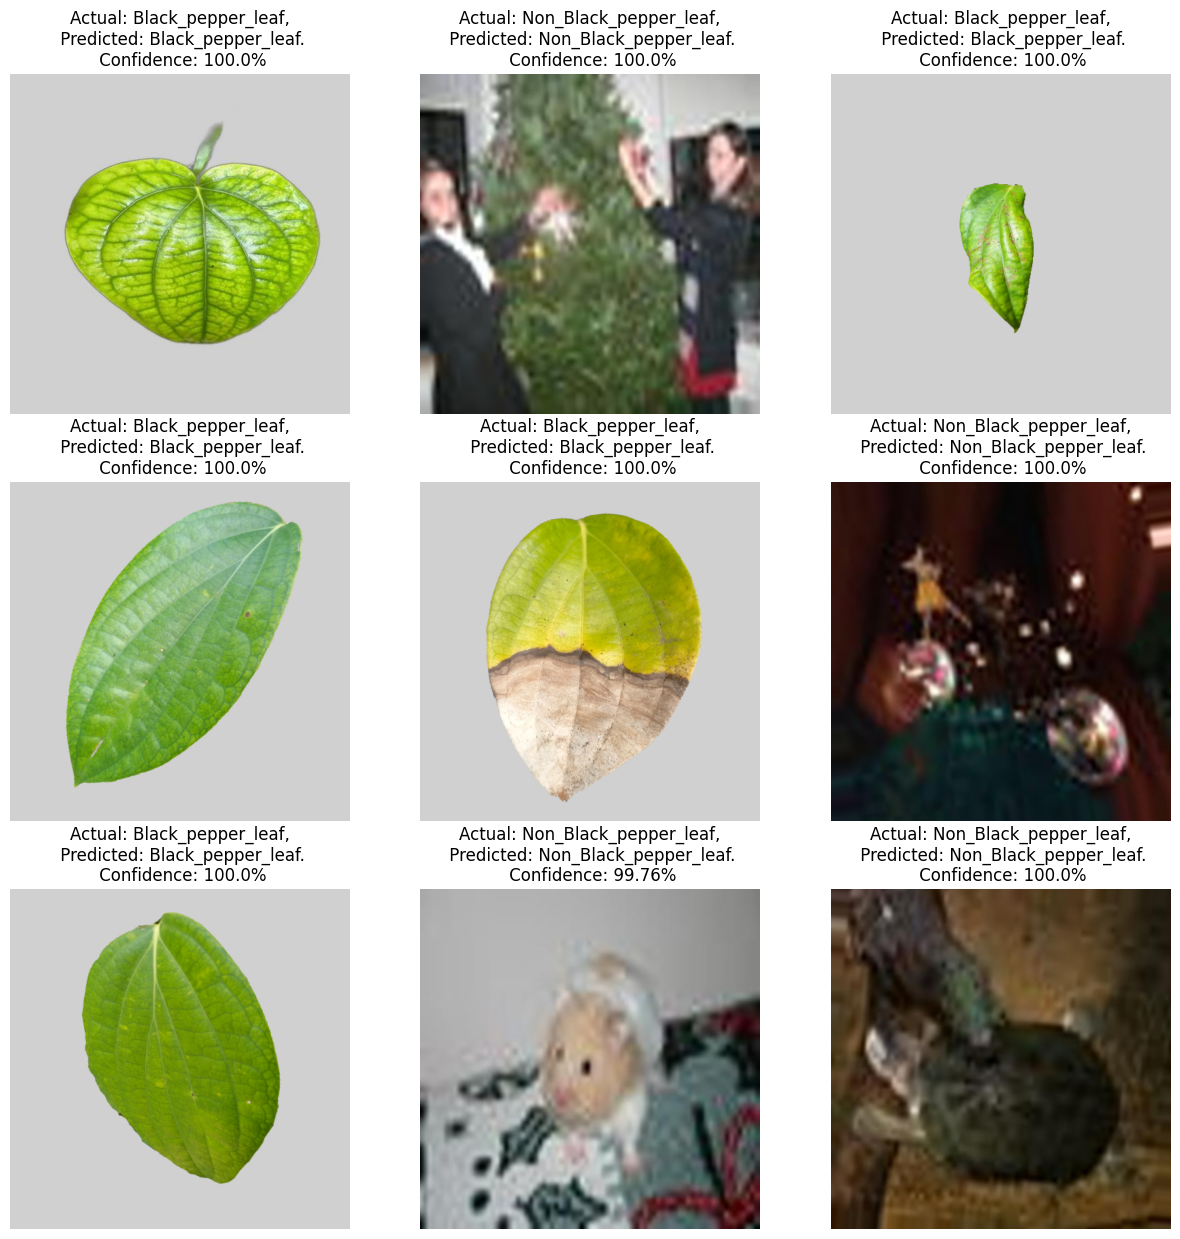

In [186]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [187]:
model.export('../Models/Black_pepper_leaf')

INFO:tensorflow:Assets written to: ../Models/Black_pepper_leaf\assets


INFO:tensorflow:Assets written to: ../Models/Black_pepper_leaf\assets


Saved artifact at '../Models/Black_pepper_leaf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name='keras_tensor_240')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1970265362832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970265363408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750774288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750769104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750773520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750768336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750770256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750770448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750771600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750771408: Tens

In [203]:
model.save('../Models/Black_pepper_leaf.keras')

In [188]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Harthik\AppData\Local\Temp\tmp698zg43b\assets


INFO:tensorflow:Assets written to: C:\Users\Harthik\AppData\Local\Temp\tmp698zg43b\assets


Saved artifact at 'C:\Users\Harthik\AppData\Local\Temp\tmp698zg43b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name='keras_tensor_240')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1970265362832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970265363408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750774288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750769104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750773520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750768336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750770256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750770448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1970750771600: TensorSpec(shape=(), dtype=tf.resource, name=None)
 

In [189]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [190]:
input_details

[{'name': 'serving_default_keras_tensor_240:0',
  'index': 0,
  'shape': array([  1, 500, 500,   3]),
  'shape_signature': array([ -1, 500, 500,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [191]:
output_details

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 37,
  'shape': array([1, 2]),
  'shape_signature': array([-1,  2]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [192]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dataset = image_dataset_from_directory(
    '../Valid_Black_pepper_leaf_dataset/Test',  # Replace with your actual test dataset directory
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    label_mode='int',  # Assuming you're using integer labels (could be 'categorical' or 'binary')
)

Found 167 files belonging to 2 classes.


In [193]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [194]:
count = 0
for image, label in test_dataset.take(5):
    print(label)
    
print(count)

tf.Tensor([0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1], shape=(32,), dtype=int32)
0


In [195]:
for image, label in test_dataset.unbatch().take(5):
    print("image shape",image.shape)
    print("label",label)

image shape (500, 500, 3)
label tf.Tensor(1, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(1, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(1, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(0, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(0, shape=(), dtype=int32)


In [196]:
for image, label in test_dataset.unbatch().take(5):
    interpreter.set_tensor(input_index, [image.numpy().astype(np.float32)])
    interpreter.invoke()

    output = interpreter.get_tensor(output_index)

In [197]:
predicted_labels = []
actual_labels = []

for image, label in test_dataset.unbatch():
    interpreter.set_tensor(input_index, [image])
    interpreter.invoke()

    output = interpreter.get_tensor(output_index)
    predicted_labels.append(np.argmax(output[0]))
    actual_labels.append(label.numpy())

In [198]:
predicted_labels[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [199]:
actual_labels[:10]

[0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

In [200]:
comparison_vector = np.array(predicted_labels) == np.array(actual_labels)
comparison_vector[:10]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True])

In [201]:
np.array([True,False,True]).mean()

0.6666666666666666

In [202]:
accuracy = comparison_vector.mean()
accuracy

0.8622754491017964